**Principal Component Analysis for Boston Housing Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()
X=boston['data']
Y=boston['target']
names=boston['feature_names']
print(X.shape)
print(Y.shape)
print(names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
X = pd.DataFrame(data=X,columns=names)
X.reset_index(drop=True).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
Y= pd.DataFrame(data=Y,columns=['Target'])
Y.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
X['Target']=Y
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


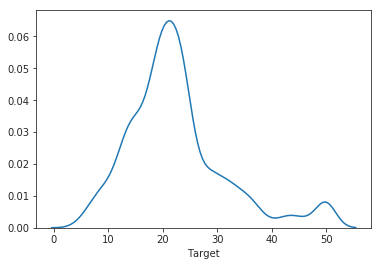

In [ ]:
 sns.distplot(X['Target'],hist=False)

In [ ]:

#Distribution of test attributes
def plot_attribute_distribution(attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(2,7,figsize=(22,18))
    
    for attribute in attributes:
        i+=1
        plt.subplot(2,7,i)
        sns.distplot(X[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

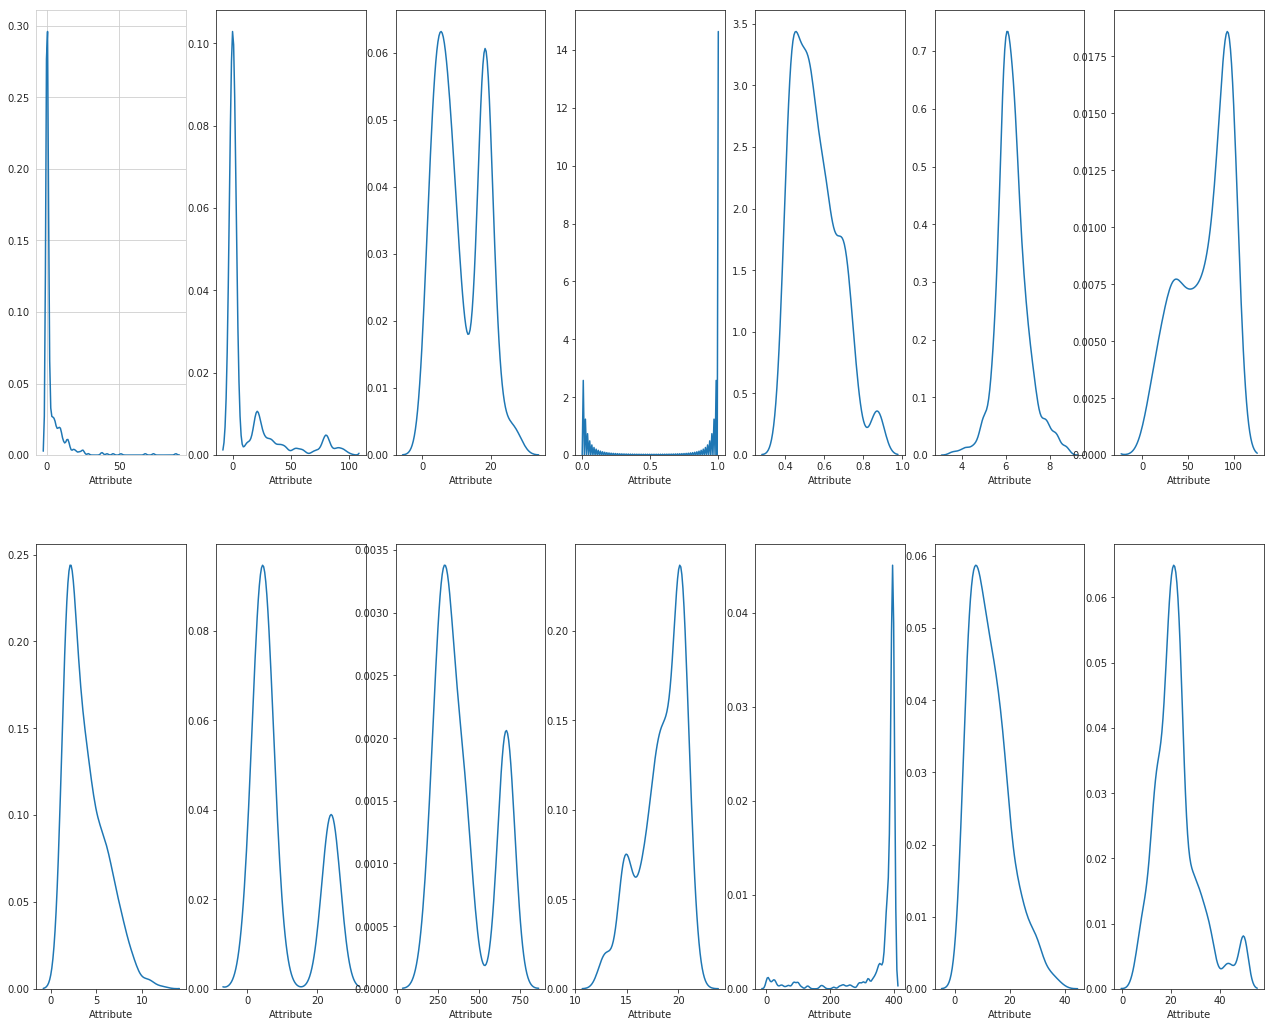

In [ ]:
attributes=X.columns.values
plot_attribute_distribution(attributes)

In [ ]:
#Normalize the data before applying the PCA
sc=StandardScaler()
sc_x=sc.fit_transform(X)
sc_x

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(sc_x)


array([[-2.0873439 ,  0.49286165],
       [-1.37338152, -0.17092629],
       [-2.37655324,  0.91399394],
       ...,
       [-0.36818962,  0.82315238],
       [-0.2643173 ,  0.54000392],
       [ 0.19523508, -0.55796585]])

In [ ]:
PrincipalComponents=pca.fit_transform(sc_x)
pca_df=pd.DataFrame(data=PrincipalComponents,columns=['Principal Component 1','Principal Component 2'])
pca_df.head()

,Principal Component 1,Principal Component 2
0,-2.087344,0.492837
1,-1.373382,-0.170959
2,-2.376553,0.914028
3,-2.837779,0.194911
4,-2.772915,0.433350


In [ ]:
boston_pca=pd.concat([pca_df,Y],axis=1)
boston_pca.head()

,Principal Component 1,Principal Component 2,Target
0,-2.087344,0.492837,24.0
1,-1.373382,-0.170959,21.6
2,-2.376553,0.914028,34.7
3,-2.837779,0.194911,33.4
4,-2.772915,0.433350,36.2


In [ ]:
pca.explained_variance_ratio_

array([0.46757068, 0.11782371])

In [ ]:
variance=[0.4675,0.1178,0.4147]
df2=pd.DataFrame(variance, columns=['Explained_Variance'])
pca=['principal component 1','principal component 2','lost data']
df1=pd.DataFrame(pca,columns=['PCA'])
df1['Explained_Variance']=df2
df1

,PCA,Explained_Variance
0,principal component 1,0.4675
1,principal component 2,0.1178
2,lost data,0.4147


In [ ]:
pca.singular_values_

AttributeError: ignored

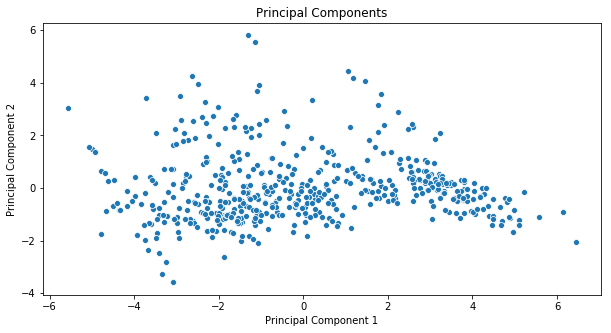

In [ ]:
#Visualization of Princiapal components
plt.figure(figsize=(10,5))
sns.scatterplot(x='Principal Component 1',y='Principal Component 2',data=boston_pca)
plt.title('Principal Components')
plt.savefig('Principal Components.png')

In [ ]:
from google.colab import files
files.download("Principal Components.png")

MessageError: ignored

In [ ]:
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=2,kernel='rbf')
kpca.fit_transform(sc_x)


array([[-0.40533431,  0.04983527],
       [-0.44076997, -0.27282866],
       [-0.44422596, -0.04590167],
       ...,
       [-0.10068554, -0.35100955],
       [-0.11653784, -0.39575701],
       [-0.13548853, -0.48321732]])

In [ ]:
PrincipalComponents=kpca.fit_transform(sc_x)
kpca_df=pd.DataFrame(data=PrincipalComponents,columns=['principal component 1','principal component 2'])
kpca_df.head()

,principal component 1,principal component 2
0,-0.405334,0.049835
1,-0.440770,-0.272829
2,-0.444226,-0.045902
3,-0.470553,0.076267
4,-0.460648,0.039313


In [ ]:
boston_kpca=pd.concat([kpca_df,Y],axis=1)
boston_kpca.head()

,principal component 1,principal component 2,Target
0,-0.405334,0.049835,24.0
1,-0.440770,-0.272829,21.6
2,-0.444226,-0.045902,34.7
3,-0.470553,0.076267,33.4
4,-0.460648,0.039313,36.2


Text(0.5, 1.0, 'PCA Visualization')

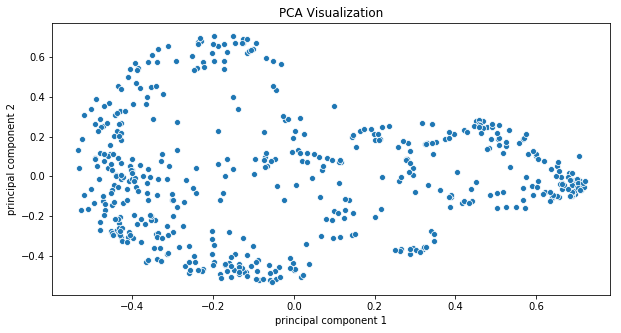

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='principal component 1',y='principal component 2',data=boston_kpca)
plt.title('PCA Visualization')